## Clustering using Gaussian Mixture Models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

D:\Coding\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


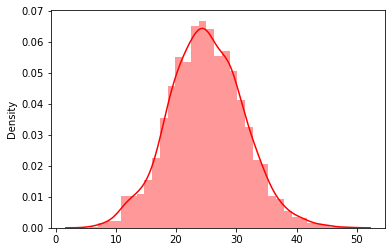

In [4]:
# Creating samples

np.random.seed(100)
X_1 = np.random.normal(loc = 25, scale = 6, size = 2000)
# loc means Mean and scale means Standard Deviation. We create 2000 data points in this case

sns.distplot(X_1, color = 'red', kde = True);

D:\Coding\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


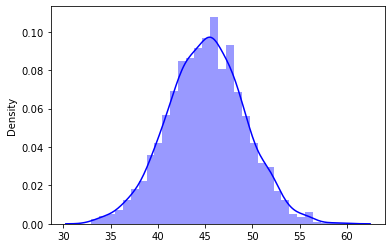

In [5]:
X_2 = np.random.normal(loc = 45, scale = 4, size = 2000)
sns.distplot(X_2, color = 'blue', kde = True);

D:\Coding\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


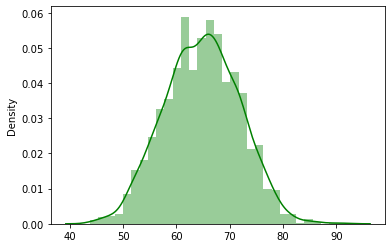

In [6]:
X_3 = np.random.normal(loc = 65, scale = 7, size = 2000)
sns.distplot(X_3, color = 'green', kde = True);

D:\Coding\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


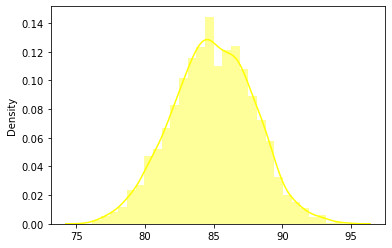

In [7]:
X_4 = np.random.normal(loc = 85, scale = 3, size = 2000)
sns.distplot(X_4, color = 'yellow', kde = True);

In [8]:
# Merging 

X = np.hstack((X_1, X_2, X_3, X_4))
X

array([14.50140716, 27.05608242, 31.91821482, ..., 79.90998889,
       86.93914663, 86.04828967])

D:\Coding\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


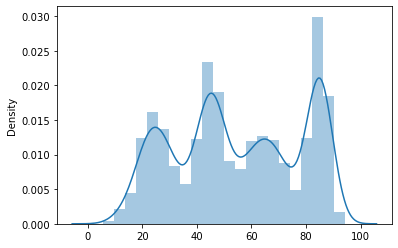

In [9]:
sns.distplot(X, kde = True);

D:\Coding\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


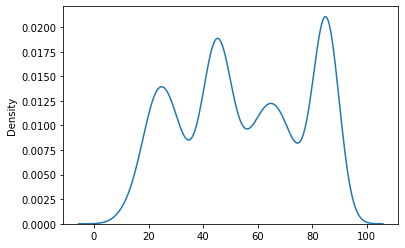

In [10]:
sns.distplot(X, kde = True, hist = False);

**X is a Gaussian Mixture Model.**

### Building a GMM model with 4 clusters

In [11]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 4, n_init = 10)

In [12]:
gmm

GaussianMixture(n_components=4, n_init=10)

In [14]:
# Training the model

gmm.fit(X.reshape(-1, 1))

GaussianMixture(n_components=4, n_init=10)

In [15]:
# Prediction

pred = gmm.predict(X.reshape(-1, 1))
pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [16]:
np.unique(pred)

array([0, 1, 2, 3], dtype=int64)

In [17]:
gmm.means_

array([[24.68757109],
       [84.86147891],
       [45.36241233],
       [65.23380989]])

In [18]:
gmm.covariances_

array([[[34.58898779]],

       [[ 9.30148053]],

       [[20.26146938]],

       [[40.75554069]]])

In [20]:
np.bincount(pred)

array([1943, 2045, 2164, 1848], dtype=int64)

In [21]:
gmm.weights_

array([0.24451547, 0.25324245, 0.2683779 , 0.23386418])

In [22]:
1943 / 8000

0.242875

In [23]:
2045/8000

0.255625

In [24]:
2164/8000

0.2705

In [25]:
1848/8000

0.231

### Finding the no of clusters

In [28]:
n_components = np.arange(1, 11)
aic_scores = []
bic_scores = []
for n in n_components:
    model = GaussianMixture(n, n_init = 10)
    model.fit(X.reshape(-1, 1))
    aic_scores.append(model.aic(X.reshape(-1, 1)))
    bic_scores.append(model.bic(X.reshape(-1, 1)))    

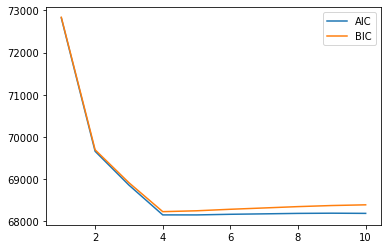

In [29]:
# Plotting the result

plt.plot(n_components, aic_scores, label = 'AIC')
plt.plot(n_components, bic_scores, label = 'BIC')
plt.legend();

**We found that the no of clusters to be 4.**

In [31]:
# Generating Samples

gmm.sample(100000)

(array([[23.57277901],
        [20.25608004],
        [19.09209204],
        ...,
        [71.45260951],
        [67.96104128],
        [66.60136912]]),
 array([0, 0, 0, ..., 3, 3, 3]))

### Building GMM for the dataset

In [40]:
data = pd.read_csv('gmm_data.csv')
data

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


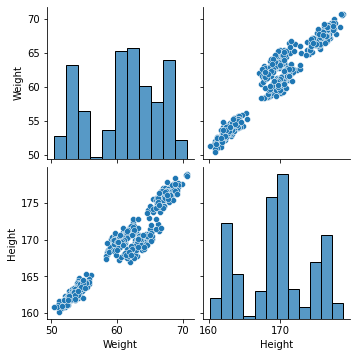

In [42]:
sns.pairplot(data);

In [43]:
# Finding the no of clusters

n_components = np.arange(1, 11)
aic_scores = []
bic_scores = []
for n in n_components:
    model = GaussianMixture(n, n_init = 10)
    model.fit(data)
    aic_scores.append(model.aic(data))
    bic_scores.append(model.bic(data)) 

D:\Coding\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Coding\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Coding\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Coding\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

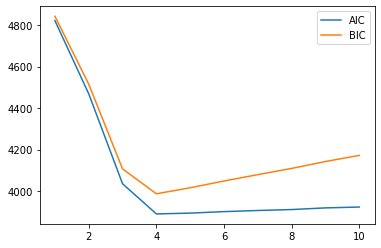

In [44]:
# Plotting the result

plt.plot(n_components, aic_scores, label = 'AIC')
plt.plot(n_components, bic_scores, label = 'BIC')
plt.legend();

**The no of clusters was found to be 4.**

In [45]:
# Model Building

gmm_data = GaussianMixture(n_components = 4, n_init = 10)

In [46]:
# Training the model

gmm_data.fit(data)

GaussianMixture(n_components=4, n_init=10)

In [47]:
gmm_data.means_

array([[ 63.29340653, 169.26192487],
       [ 53.60032207, 162.76480175],
       [ 60.65965331, 170.03408316],
       [ 67.50985394, 175.97078199]])

In [48]:
gmm_data.covariances_

array([[[1.56855087, 1.12091738],
        [1.12091738, 1.13465758]],

       [[1.24923216, 0.95686471],
        [0.95686471, 1.02835817]],

       [[1.31553487, 0.97514708],
        [0.97514708, 1.08387744]],

       [[1.30109731, 0.97830282],
        [0.97830282, 1.15566526]]])

In [52]:
data['Label'] = data_pred

In [53]:
data_pred

array([3, 3, 2, 2, 3, 0, 0, 2, 2, 1, 0, 3, 0, 1, 2, 2, 3, 2, 1, 2, 2, 3,
       0, 1, 2, 1, 3, 0, 1, 0, 0, 0, 3, 0, 0, 3, 1, 2, 1, 3, 1, 2, 2, 3,
       0, 3, 2, 2, 3, 3, 1, 1, 0, 2, 2, 0, 0, 1, 1, 3, 3, 1, 3, 3, 3, 0,
       2, 3, 2, 0, 1, 2, 1, 3, 1, 3, 0, 0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1,
       3, 1, 1, 1, 3, 1, 2, 2, 3, 3, 3, 2, 1, 1, 3, 1, 2, 2, 0, 3, 2, 1,
       1, 0, 1, 1, 3, 1, 3, 2, 0, 3, 2, 1, 3, 3, 1, 3, 3, 3, 3, 1, 2, 1,
       0, 1, 1, 1, 2, 3, 2, 0, 3, 3, 3, 3, 0, 1, 2, 2, 0, 1, 1, 3, 2, 2,
       2, 0, 0, 3, 0, 2, 3, 2, 3, 3, 0, 0, 3, 2, 1, 0, 3, 1, 3, 0, 2, 1,
       2, 1, 1, 1, 3, 3, 3, 2, 0, 1, 0, 3, 0, 1, 3, 0, 1, 0, 0, 1, 2, 0,
       2, 1, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 3, 3, 3, 2, 3, 0, 1, 1, 1,
       2, 3, 0, 1, 0, 3, 1, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 3, 3, 0,
       0, 3, 1, 1, 2, 3, 2, 2, 2, 0, 3, 1, 2, 1, 1, 0, 1, 0, 2, 2, 3, 1,
       3, 3, 2, 2, 1, 3, 2, 1, 3, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 0, 3, 0,
       0, 3, 2, 2, 2, 3, 1, 1, 3, 1, 1, 1, 2, 3, 3,

In [56]:
data['Label'].value_counts()

3    126
2    125
1    125
0    124
Name: Label, dtype: int64

### Visualizing the Clusters

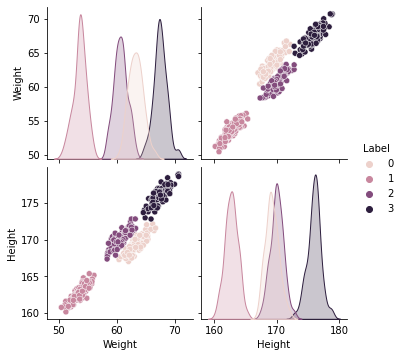

In [59]:
sns.pairplot(data, hue = "Label");